In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
placa=[]
image1 = cv2.imread('D:\criss\Documents\Alex\ciclo 7\Inteligencia Artificial//placas1.jpg')
image2 = cv2.imread('D:\criss\Documents\Alex\ciclo 7\Inteligencia Artificial//placas2.jpg')
image3 = cv2.imread('D:\criss\Documents\Alex\ciclo 7\Inteligencia Artificial//placas3.jpg')
image4 = cv2.imread('D:\criss\Documents\Alex\ciclo 7\Inteligencia Artificial//placas4.jpg')

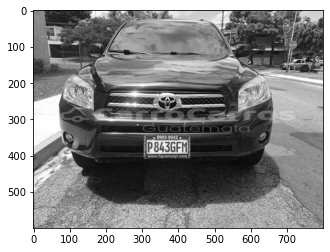

In [3]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray');

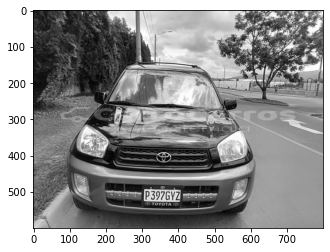

In [4]:
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray');

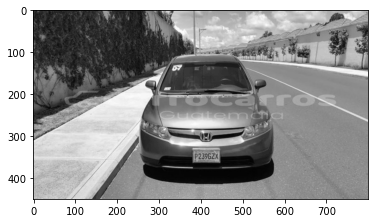

In [5]:
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plt.imshow(gray3, cmap='gray');

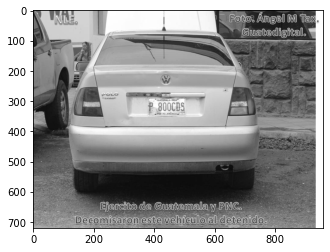

In [6]:
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
plt.imshow(gray4, cmap='gray');

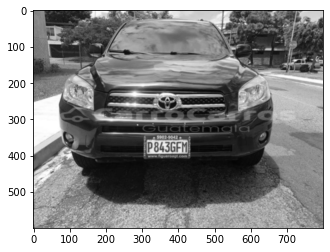

In [7]:
gray1 = cv2.blur(gray1,(3,3))
plt.imshow(gray1,cmap='gray');

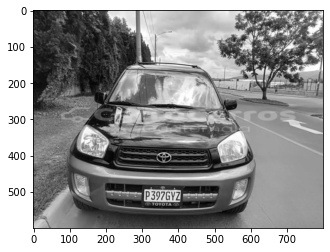

In [8]:
gray2 = cv2.blur(gray2,(2,2))
plt.imshow(gray2,cmap='gray');

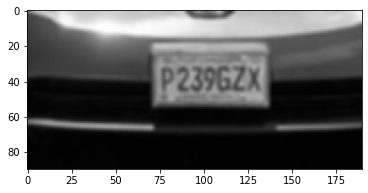

In [9]:
gray3 = cv2.blur(gray3[310:400, 310:500],(3,3))
plt.imshow(gray3,cmap='gray');

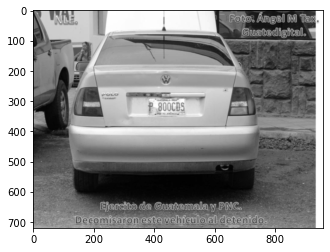

In [10]:
gray4 = cv2.blur(gray4,(3,3))
plt.imshow(gray4,cmap='gray');

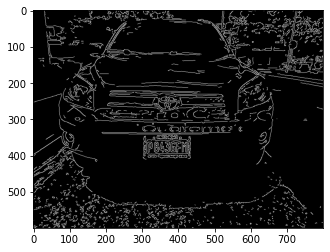

In [11]:
canny1 = cv2.Canny(gray1,150,200)
plt.imshow(canny1,cmap='gray');

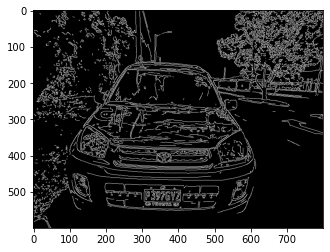

In [12]:
canny2 = cv2.Canny(gray2,150,200)
plt.imshow(canny2,cmap='gray');

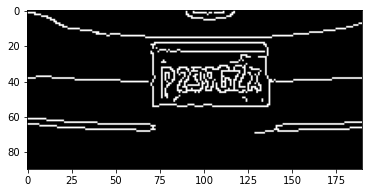

In [13]:
canny3 = cv2.Canny(gray3, 150,100)
plt.imshow(canny3,cmap='gray');

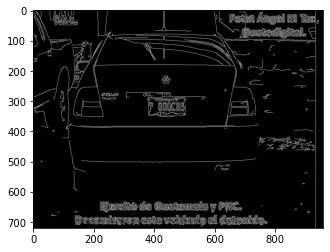

In [14]:
canny4 = cv2.Canny(gray4,100,200)
plt.imshow(canny4,cmap='gray');

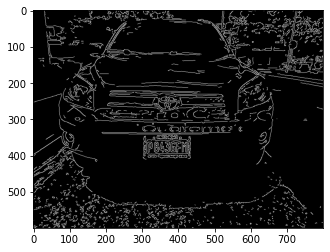

In [15]:
canny1 = cv2.dilate(canny1, None, iterations=0)
plt.imshow(canny1, cmap='gray');

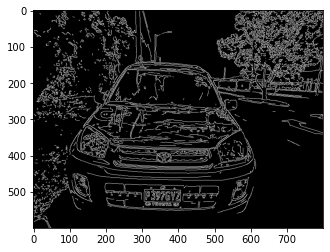

In [16]:
canny2 = cv2.dilate(canny2, None, iterations=0)
plt.imshow(canny2, cmap='gray');

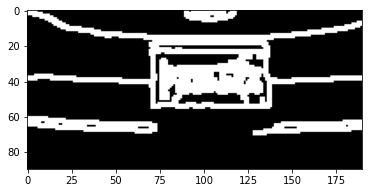

In [17]:
canny3 = cv2.dilate(canny3, None, iterations=1)
plt.imshow(canny3, cmap='gray');

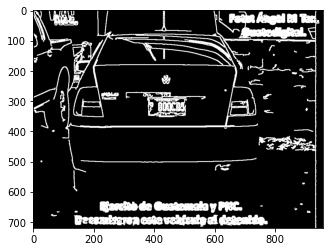

In [18]:
canny4 = cv2.dilate(canny4, None, iterations=1)
plt.imshow(canny4, cmap='gray');

In [46]:
#Open cv3
#_, cnts, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#Open cv4
numero = input('Ingrese la imagen a buscar la placa de 1-4: ');
numero = int(numero);
if numero == 1:
    cnts, _ = cv2.findContours(canny1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image = image1.copy()
    gray = gray1.copy()
elif numero == 2:
    cnts, _ = cv2.findContours(canny2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image = image2.copy()
    gray = gray2.copy()
elif numero == 3:
    cnts, _ = cv2.findContours(canny3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image = image3[310:400, 310:500].copy()
    gray = gray3.copy()
elif numero == 4:
    cnts, _ = cv2.findContours(canny4, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image = image4.copy()
    gray = gray4.copy()
else:
    print("Fuera de rango");

Ingrese la imagen a buscar la placa de 1-4: 4


In [47]:
for c in cnts:
    area = cv2.contourArea(c)
    #if area > 8000: print(area)
    x, y, w, h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if numero == 1:
        #para imagen 1 funcional 
        if len(approx) == 4 and area > 4281:
            print('area: ', area)
            print('w: ', w)
            print('h: ', h)
            aspect_ratio = float(w)/h
            print('Relacion de aspecto: ', aspect_ratio)
            cv2.drawContours(image1, [approx], 0, (0,255,0), 3)
            if aspect_ratio>2.80:
                placa = gray[y:y+h, x:x+w]
                text = pytesseract.image_to_string(placa).strip()
                print('Placa: ', text)
                cv2.rectangle(image1, (x, y), (x+w, y+h), (0, 255, 0), 3)
                cv2.putText(image1, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 3)
    elif numero == 2:
        #para imagen 2
        if len(approx) == 4 and area > 3363:
            print(len(approx))
            print('area: ', area)
            print('w: ', w)
            print('h: ', h)
            aspect_ratio = float(w)/h
            print('Relacion de aspecto: ', aspect_ratio)
            cv2.drawContours(image, [approx], 0, (0,255,0), 3)
            if aspect_ratio>2.42:
                placa = gray[y:y+h, x:x+w]
                text = pytesseract.image_to_string(placa).strip()
                print('Placa: ', text)
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
                cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 3)
    elif numero == 3:
        #para imagen 3
        if area == 399.5:
            print(len(approx))
            print('area: ', area)
            print('w: ', w)
            print('h: ', h)
            aspect_ratio = float(w)/h
            print('Relacion de aspecto: ', aspect_ratio)
            cv2.drawContours(image, [approx], 0, (0,255,0), 3)
            if aspect_ratio>1.58:
                placa = gray[y:y+h, x:x+w]
                text = pytesseract.image_to_string(placa).strip()
                print('Placa: ', text)
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
                cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 3)
    elif numero == 4:
        #imagen 4
        if len(approx) == 3 and area > 2172:
            print(len(approx))
            print('area: ', area)
            print('w: ', w)
            print('h: ', h)
            aspect_ratio = float(w)/h
            print('Relacion de aspecto: ', aspect_ratio)
            #cv2.drawContours(image, [approx], 0, (0,255,0), 3)
            if aspect_ratio>2.10:
                placa = gray[y:y+h, x:x+w]
                text = pytesseract.image_to_string(placa).strip()
                print('Placa: ', text)
                cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
                cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 3)

3
area:  2173.0
w:  116
h:  55
Relacion de aspecto:  2.109090909090909
Placa:  P. B00CBS


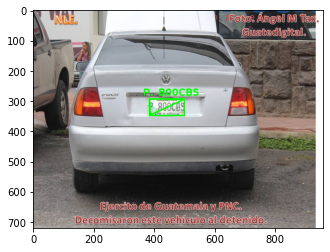

In [48]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));